<a href="https://colab.research.google.com/github/smclell/CSC-591-TEDL-HW1/blob/main/HW1_CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Training CNN for Image Classification
In this assignment, we will learn and practice how to train a CNN using PyTorch, a commonly used deep learning framework. Please respond/report all questions in this assignment.

#### Click `file` and click `save a copy in drive` to make a copy in your Google Drive Workspace.

## 1. Make sure you have an avaliable NVIDIA GPU
Different from traditional machine learning, a GPU is always neccessary to train a deep learning model.

So, please check if your device has an avaliable GPU first.

**PS:** Due to the limited GPU hours in Colab, I recommond you check it before train the CNN.

In [ ]:
!nvidia-smi

Tue Feb  4 20:33:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Check where your directory is.

In [ ]:
!pwd

/content



## 2. Know what is MNIST dataset
The introduction can be found here: https://paperswithcode.com/dataset/mnist

In PyTorch, we have two modules for loading and patching datasets: **torch.utils.data.Dataset** and **torch.utils.data.DataLoader**.


Dataset class is to define a dataset by yourself. And Dataloader is for sampling the data points to train the model. We'll use MNIST as an example to show you how to iterate a dataset.

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)) # Normalization is for better model performance!
])

*   transforms.ToTensor() is to transform the data type to PyTorch tensor, a standard calculation matrix module in PyTorch.
*   transforms.Normalize((0.5,), (0.5,)) is to do Normalization for each channel with the following way:
** image = (image - mean) / std
* if you want to recover the original images, you can do it in the following way:
** image = ((image * std) + mean)

Now, we can load a dataset from PyTorch!

In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 495kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.58MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.24MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



We can check the #samples in the two datasets using **len()**

In [ ]:
print(len(train_dataset), len(test_dataset))

60000 10000


Now, we'd like to see what a sample in MNIST looks like.

For the first 10 samples in train set, we can display it in the following way:

In [ ]:
images, labels = [], []
for i in range(10): # load 10 pictures
    img, label = train_dataset.__getitem__(i) # i-th datapoint and its label
    images.append(img)
    labels.append(label)

In [ ]:
# Let's see a sample's data shape
print(images[0].size(), labels[0])

torch.Size([1, 28, 28]) 5


As we can see, in MNIST, each image has 1 channel and 28*28 in shape.

Then, we use matplotlib to show them here

In [ ]:
import matplotlib.pyplot as plt

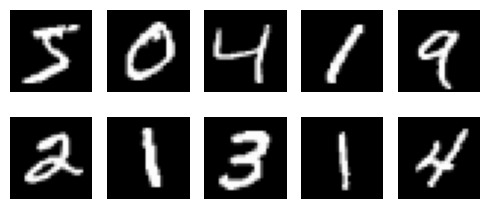

In [ ]:
# Plot the images
plt.figure(figsize=(5, 2.5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.axis("off")
plt.tick_params(top=False,bottom=False,left=False,right=False)
plt.tight_layout()
plt.show()

**[Q1] For each digit, please find a corresponding data point from test set and display them in the same way and sort them in ascending order (from 0 to 9).**

In [ ]:
# do your code and upload the result

Now, let's use an automatical tool to iterate the samples in order or randomly with DataLoader module.

In [ ]:
# you can adjust the batchsize to change #sample in each iteration and shuffle to change if it is random.
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [ ]:
# for iterating a dataloader, you can use this way:
for images, labels in test_loader:
    pass # you can write training codes in the loop.

## 3. Know CNN computation modules

In [ ]:
import torch
import torch.nn as nn # this module is for components in neural networks

In [ ]:
# To process an image, we usually start from a 2D convolution layer
c2d = nn.Conv2d(1, 3, kernel_size=5, stride=2, padding=2) # hyper-parameters are #input_channel, #output_channel, kernel_size, stride, zero_padding

A convolution layer acts like this:

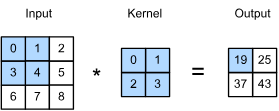

ref: https://d2l.ai/chapter_convolutional-neural-networks/conv-layer.html

Now, we want to feed a data point into it:

In [ ]:
# We can pass a data point with it easily:
img = torch.randn(1, 1, 28, 28) # batch_size, channel_size, height, width
out = c2d(img)
print(out.size())

torch.Size([1, 3, 14, 14])


With a stride, we can downsample the image from torch.Size([1, 1, 28, 28]) to torch.Size([1, 3, 14, 14])


There is another module can achieve downsampling, it does not have any parameter to train:

In [ ]:
ap2d = nn.AvgPool2d(kernel_size=2, stride=2)  # 28x28 -> 14x14
out = ap2d(img)
print(out.size())

torch.Size([1, 1, 14, 14])


Another important module is Linear layer, it can process 1D data only (regradless of batch demension):

In [ ]:
feature = torch.randn(1, 3)
fc = nn.Linear(3, 10)
out = fc(feature)
print(out.size())

torch.Size([1, 10])


To make image data can be fed into Linear layers, you can use view() to change its shape:

In [ ]:
feature = img.view(1,1,28*28)
fc = nn.Linear(28*28, 10)
out = fc(feature)
print(out.size())

torch.Size([1, 1, 10])


When the Linear layer is combined with Softmax, it can produce probabilities for multiple classes.
The outputs produced by softmax will be limited in the range of (0,1), and the sum of all classes' probabilities is 1 (without considering the computational error of the computer).

In [ ]:
feature = torch.randn(1, 3)
fc = nn.Linear(3, 10)
out = fc(feature)
prob = torch.softmax(out, dim=-1)
print(out)
print(prob)
print(torch.sum(prob))

tensor([[ 0.0201, -1.2989,  0.7255, -0.3562, -0.2326,  0.4900, -0.5721, -0.2801,
          0.5281, -0.5331]], grad_fn=<AddmmBackward0>)
tensor([[0.1012, 0.0270, 0.2048, 0.0694, 0.0786, 0.1618, 0.0560, 0.0749, 0.1681,
         0.0582]], grad_fn=<SoftmaxBackward0>)
tensor(1.0000, grad_fn=<SumBackward0>)


And you can get the prediction by argmax:

In [ ]:
pred = torch.argmax(prob, dim=1)
print(pred)

tensor([2])


Now, we'll use them to build a CNN called LeNet, the LeNet I give it to you is for processing images with (1,32,32) data shape.

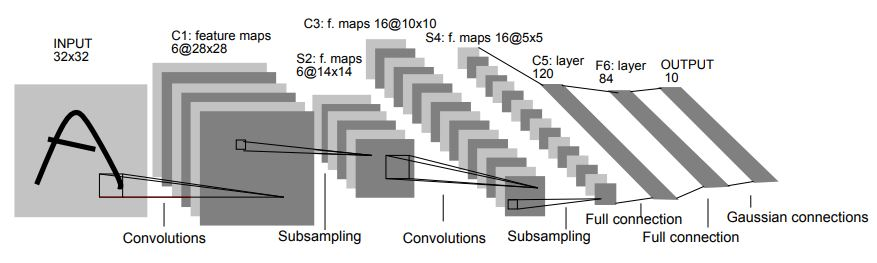

ref: https://github.com/rasbt/deeplearning-models/blob/master/pytorch_ipynb/cnn/cnn-lenet5-cifar10.ipynb

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        b, c, h, w = x.size()
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(b, -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In PyTorch, we do not have to set the SoftMax function in the model since it is set in the loss function.

We can know how data demensions change during forwarding using **torchsummary**.

In [ ]:
from torchsummary import summary
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet().to(device)
summary(model, (1, 32, 32)) #channel_size, h, w

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         AvgPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         AvgPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.30
----------------------------------------------------------------


With this way, we can know how the data pass through the model and how the data shape changes.

**[Q2] The LeNet shown above is for 32\*32 single channel images. Try to modify it to fit the MNIST input shape (28\*28). Please upload screenshot of torchsummary result after modification with input shape of (1,28,28).**

tips: consider how the data shape changes in each layer.

In [ ]:
# do your code and upload the result, you can modify your LeNet in-place or copy it to here

## 4. Train the model
Now, you can use your modified LeNet to do the training task!

In [ ]:
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler

In [ ]:
# first, we check if we can use GPU. We need to put the data and the model on the same device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# Then, we initialize the model, loss, and optimizer
model = LeNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [ ]:
# We need to set the learning rate changing scheduler, it will be lr=lr*gamma each 20 epochs
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [ ]:
# Training loop
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    return running_loss / len(train_loader)

# Testing loop
def test(model, test_loader, device):
    model.eval()
    correct = 0
    loss_sum = 0
    total = 0

    loss_func = nn.CrossEntropyLoss(reduction='sum')
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = loss_func(outputs, labels)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss_sum += loss.item()

    return loss_sum/total, 100*correct/total

# Main training and testing
num_epochs = 30 # we train the model in 30 epochs
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_loss, test_accuracy = test(model, test_loader, device)
    scheduler.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Tr_Loss: {train_loss:.4f}, Te_Loss: {test_loss:.4f}, Te_Accuracy: {test_accuracy:.2f}%")

# Save the model
torch.save(model, 'hw1_model.pth') # you'd better download your model or save it in your Google Drive.

**[Q3] Show your final training and testing accuracy and average loss. Please upload the results.**

In [ ]:
# do your code and upload the result.